### IMPORT REQUIRED LIBRARIES

Import all the required libraries that help us with text analytics.

In [1]:
#For data importing, exploration and manipulation
import pandas as pd
import numpy as np

#For visualisation
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 
import pyLDAvis
import pyLDAvis.gensim_models
import chart_studio
import chart_studio.plotly as py 
import chart_studio.tools as tls

#Base and Cleaning text
import json
import requests
import emoji
import regex
import re
import string
from collections import Counter

#Natural Language Processing (NLP)
import spacy
import gensim
from spacy.tokenizer import Tokenizer
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS as SW
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

### Exploratory Data analysis

Import the data into a pandas dataframe and perform initial data exploration such as checking the shape of the dataframe, checking the data types, and missing values.

In [3]:
tweets_df = pd.read_csv("../Data/facup_2k.csv")

tweets_df.head(10)

,author_id,statuses_count,location,verified,followers_count,friends_count,listed_count,favourites_count,tweet_id,text,created_at,lang,retweet_count,hashtags,favorite_count
0,61862026,27072,Sheffield,False,28611,1206,90,27150,1631081854794120000,"🎶 Hecky, Jack and Stuart McCalllll 🎶\n\n#sufc ...",01/03/2023 23:59,en,1,"[{'text': 'sufc', 'indices': [38, 43]}, {'text...",25
1,143908296,18866,Wilmslow,False,3056,2970,39,21259,1631081534156420000,Another amazing night at Old Trafford with the...,01/03/2023 23:58,en,0,"[{'text': 'MUFC', 'indices': [85, 90]}, {'text...",4
2,1571018456698320000,333,"London, England",False,32,14,0,2224,1631081469857730000,People talking shit on Garnarcho an 18 year ol...,01/03/2023 23:58,en,0,"[{'text': 'garnacho', 'indices': [159, 168]}, ...",1
3,61083422,234739,Petaling Jaya,False,172910,458,909,3951,1631081336957180000,"Three days after they won the League Cup, Manc...",01/03/2023 23:57,en,0,"[{'text': 'theSun', 'indices': [122, 129]}, {'...",0
4,40720345,127010,"Amsterdam, The Netherlands",False,3236,1302,63,19275,1631081179729350000,I'm 100% convinced that the ball is completely...,01/03/2023 23:57,en,0,"[{'text': 'FACup', 'indices': [83, 89]}]",1
5,1316497555648320000,2844,Italia,False,166,287,1,7362,1631081011986540000,The #ManchesterUnited is back big \n🔴⚫️⚪️\n\n#...,01/03/2023 23:56,en,0,"[{'text': 'ManchesterUnited', 'indices': [4, 2...",2
6,1574876929596980000,17,United States,False,5,27,0,0,1631081009012670000,GTA Abel Staged Keith Vallas Ticketmaster Pika...,01/03/2023 23:56,en,0,"[{'text': 'FACup', 'indices': [110, 116]}]",0
7,1514967218307670000,641,NaN,False,33,123,0,11,1631080878700120000,Tune in to The Touchline Talk Show NOW for a f...,01/03/2023 23:56,en,1,"[{'text': 'FACup', 'indices': [63, 69]}, {'tex...",0
8,1018632081344280000,48906,"Wolverhampton, England",False,1670,2685,0,61614,1631080876791430000,"A great turnaround from United, as we showed g...",01/03/2023 23:55,en,0,"[{'text': 'GlazersOut', 'indices': [177, 188]}...",2
9,467640633,630,NaN,False,134,488,0,637,1631080733014990000,On to the next round #FACup #MUFC https://t.co...,01/03/2023 23:55,en,0,"[{'text': 'FACup', 'indices': [21, 27]}, {'tex...",1


In [3]:
#Check the shape of the data frame
tweets_df.shape

(2592, 15)

In [4]:
tweets_df.columns

Index(['author_id', 'statuses_count', 'location', 'verified',
       'followers_count', 'friends_count', 'listed_count', 'favourites_count',
       'tweet_id', 'text', 'created_at', 'lang', 'retweet_count', 'hashtags',
       'favorite_count'],
      dtype='object')

We have 2592 tweets regarding FA cup. And there are 15 features as listed above.

In [5]:
#Check for data types
tweets_df.dtypes

author_id            int64
statuses_count       int64
location            object
verified              bool
followers_count      int64
friends_count        int64
listed_count         int64
favourites_count     int64
tweet_id             int64
text                object
created_at          object
lang                object
retweet_count        int64
hashtags            object
favorite_count       int64
dtype: object

The different data types are fine except the created_at column which should be a date time. So let us correct it.

In [4]:
from datetime import datetime

tweets_df.created_at = tweets_df.created_at.apply(lambda time_str: datetime.strptime(time_str, '%d/%m/%Y %H:%M'))

In [7]:
tweets_df.dtypes

author_id                    int64
statuses_count               int64
location                    object
verified                      bool
followers_count              int64
friends_count                int64
listed_count                 int64
favourites_count             int64
tweet_id                     int64
text                        object
created_at          datetime64[ns]
lang                        object
retweet_count                int64
hashtags                    object
favorite_count               int64
dtype: object

Now let us check for date range of the tweets.

In [8]:
print("From date: ", tweets_df.created_at.min())
print("To date: ", tweets_df.created_at.max())

From date:  2023-02-22 05:13:00
To date:  2023-03-01 23:59:00


Now lets check for missing values

In [9]:
tweets_df.isnull().sum()

author_id             0
statuses_count        0
location            763
verified              0
followers_count       0
friends_count         0
listed_count          0
favourites_count      0
tweet_id              0
text                  0
created_at            0
lang                  0
retweet_count         0
hashtags              0
favorite_count        0
dtype: int64

Only location has null values, but since we are not performing geospatial analyisis, we will be ignoring this column.

### Engagement

Now let us analysis how the engagement on topic FA cup is on twitter. As in the number of users talking about it. The number of followers for major accounts. The average number of retweets of major accounts and so on.

In [5]:
#Check unique number of users
len(tweets_df.author_id.unique())

1974

1974 unique users are tweeting about FA cup in a week.

Next we will check the number of accounts with more than 100k followers.

In [6]:
accounts_100k_gt = tweets_df.loc[tweets_df.followers_count >= 100000]
accounts_100k_gt = accounts_100k_gt.loc[accounts_100k_gt.favorite_count >= 100]
len(accounts_100k_gt.author_id.unique())

17

There are 17 accounts with follower count more than 100k and accounts with likes more than 100 per tweet.

We can now check average number of likes and retweets these accounts are getting to get an idea of number of users who engage in just liking and retweeting on average rather than tweeting on thier own.

(array([28.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.]),
 array([  101. ,  5262.6, 10424.2, 15585.8, 20747.4, 25909. , 31070.6,
        36232.2, 41393.8, 46555.4, 51717. ]),
 <BarContainer object of 10 artists>)

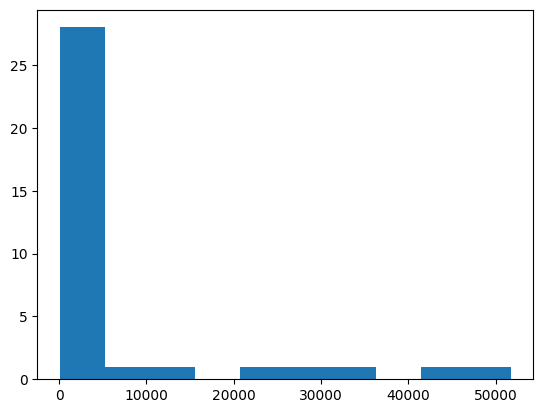

In [7]:
plt.hist(accounts_100k_gt.favorite_count)

In [8]:
#Now we will check max likes and average likes, max retweets and average retweets.

print("Max likes a tweet by major account gets: ", accounts_100k_gt.favorite_count.max())
print("Average likes a tweet by major account gets: ", accounts_100k_gt.favorite_count.mean())
print("Max retweets a tweet by major account gets: ", accounts_100k_gt.retweet_count.max())
print("Average retweets a tweet by major account gets: ", accounts_100k_gt.retweet_count.mean())

Max likes a tweet by major account gets:  51717
Average likes a tweet by major account gets:  6200.142857142857
Max retweets a tweet by major account gets:  4540
Average retweets a tweet by major account gets:  516.2285714285714


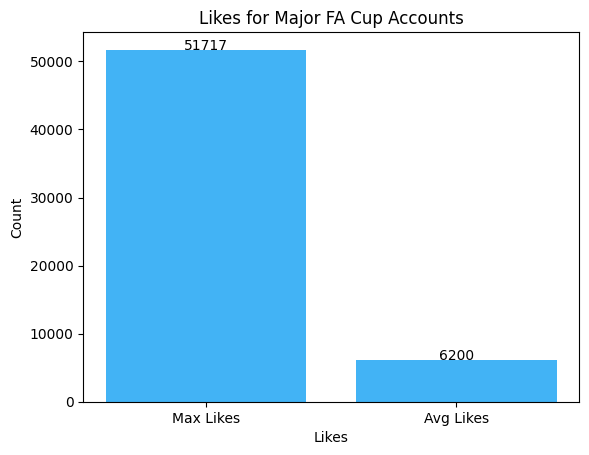

In [15]:
# data
max_likes = accounts_100k_gt.favorite_count.max()
avg_likes = accounts_100k_gt.favorite_count.mean()

# create bar chart
labels = ['Max Likes', 'Avg Likes']
values = [max_likes, avg_likes]
plt.bar(labels, values,color="#42b3f5")

#Set datalabels
for i, v in enumerate(values):
    plt.text(i, v, str(round(v)), color='black', ha='center')

# set chart title and axis labels
plt.title('Likes for Major FA Cup Accounts')
plt.xlabel('Likes')
plt.ylabel('Count')

# display chart
plt.show()

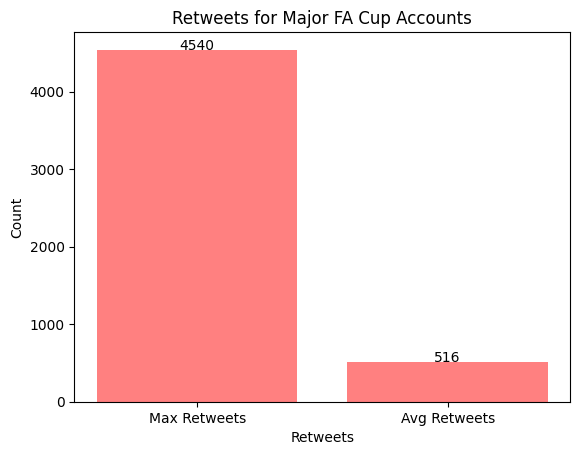

In [14]:
max_retweets = accounts_100k_gt.retweet_count.max()
avg_retweets = accounts_100k_gt.retweet_count.mean()

# create bar chart
labels = ['Max Retweets', 'Avg Retweets']
values = [max_retweets, avg_retweets]
plt.bar(labels, values,color="#ff8080")

#Set datalabels
for i, v in enumerate(values):
    plt.text(i, v, str(round(v)), color='black', ha='center')

# set chart title and axis labels
plt.title('Retweets for Major FA Cup Accounts')
plt.xlabel('Retweets')
plt.ylabel('Count')

# display chart
plt.show()

### Timeseries analysis

To analyse when the tweets are peaking, let us plot a graph of number of tweets over tweet created time.

In [16]:
#Group by created at column to get hourly buckets of number of tweets
hourly_data = tweets_df['created_at'].groupby(by=[tweets_df.created_at.map(lambda x : datetime(x.year, x.month, x.day, x.hour))]).count()
hourly_data

created_at
2023-02-22 05:00:00      2
2023-02-22 06:00:00      2
2023-02-22 07:00:00      1
2023-02-22 08:00:00      1
2023-02-22 09:00:00      4
                      ... 
2023-02-27 22:00:00     10
2023-02-27 23:00:00      8
2023-03-01 21:00:00    992
2023-03-01 22:00:00    877
2023-03-01 23:00:00    186
Name: created_at, Length: 97, dtype: int64

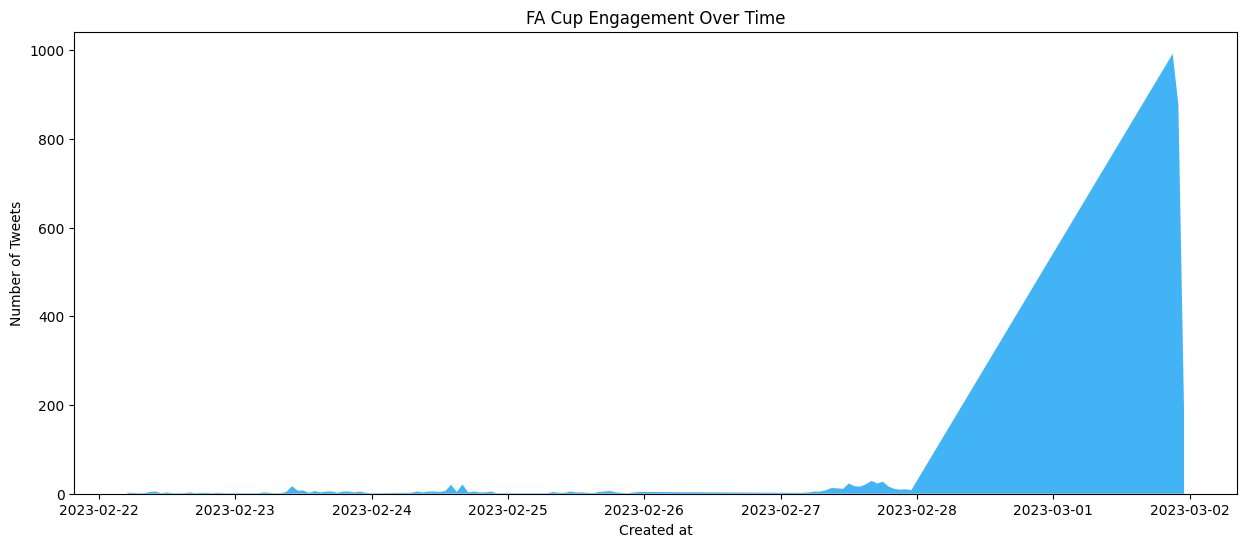

In [21]:
#Plot the graph
plt.figure(figsize=(15,6))
plt.title('FA Cup Engagement Over Time')
plt.xlabel('Created at')
plt.ylabel('Number of Tweets')
plt.stackplot(hourly_data.keys(),hourly_data.values, colors=['#42b3f5'])
plt.show()


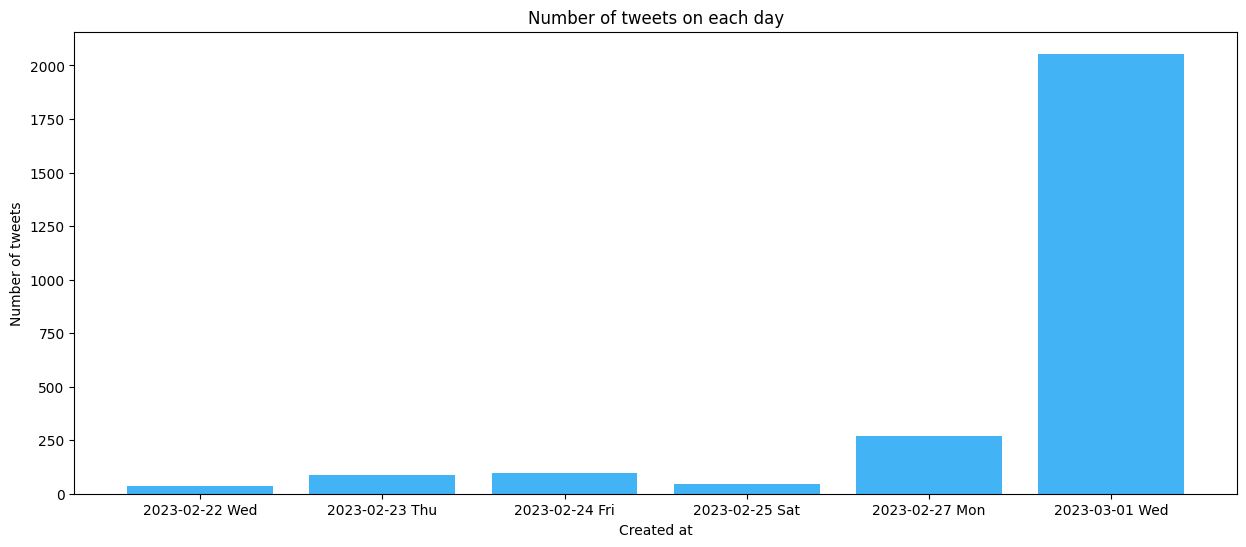

In [16]:
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_agg = tweets_df['created_at'].groupby(by=[tweets_df.created_at.map(lambda x : x.strftime('%Y-%m-%d ') + weekdays[x.weekday()])]).count()

days = weekday_agg.keys().to_numpy()
values = weekday_agg.values

plt.figure(figsize=(15,6))
plt.xlabel('Created at')
plt.ylabel('Number of tweets')
plt.title('Number of tweets on each day')
plt.bar(days,values,color='#42b3f5')
plt.show()

As we can see, the number tweets are considerably more when the FA cup matches are held.

### Mentions and Hashtags

Now we will start looking at actual tweets. Some of the analysis we can do before cleaning the tweets are prevalence of mentions, and prominent hashtags.

In [22]:
#Function to get mentions and hashtags tweets
def get_mentions_hashtags(tweet):
    mentions = [];
    hashTags = [];
    for word in tweet.split(' '):
        if word.startswith('@') and len(word) > 1:
            mentions.append(word[1:])
        if word.startswith('#') and len(word) > 1:
            hashTags.append(word[1:]) 
    return mentions, hashTags

In [24]:
mentions_hashtags = tweets_df.text.apply(lambda tweet: get_mentions_hashtags(tweet))

mentions = []
hashtags = []
for i in mentions_hashtags:
    mentions = [*mentions,*i[0]]
    hashtags = [*hashtags,*i[1]]


In [25]:
top_mentions = pd.Series(mentions).value_counts().head(10)

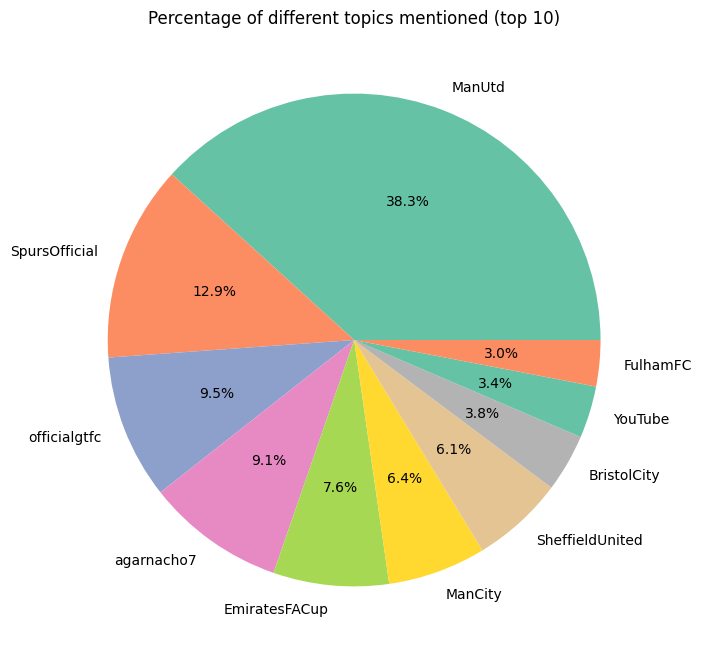

In [51]:
mentions_keys = top_mentions.keys().to_numpy()
number_of_mentions = top_mentions.values
plt.figure(figsize=(10,8))
plt.title('Percentage of different topics mentioned (top 10)')
plt.pie(number_of_mentions, labels=mentions_keys, autopct='%1.1f%%',colors=sns.color_palette('Set2'))
#plt.bar(mentions_keys,number_of_mentions,color='#42b3f5')
plt.show()

In [33]:
top_hashtags = pd.Series(hashtags).value_counts().head(10)

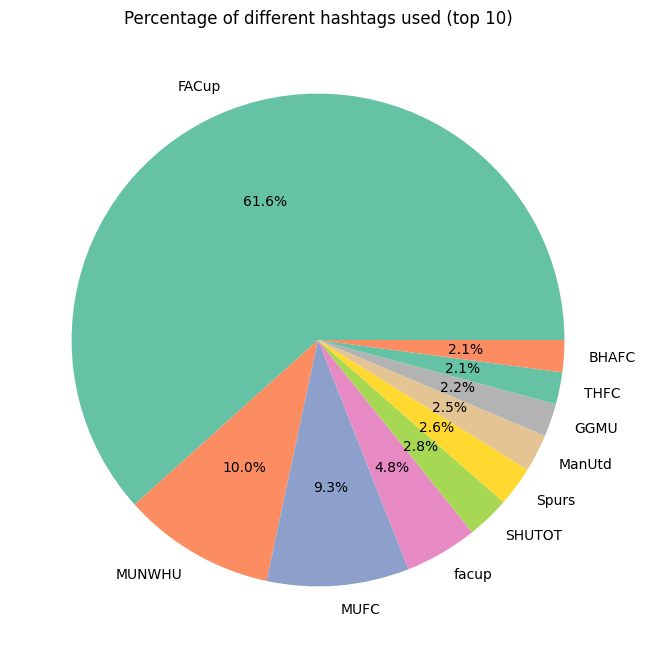

In [52]:
hashtag_keys = top_hashtags.keys().to_numpy()
number_of_hashtags = top_hashtags.values
plt.figure(figsize=(10,8))
plt.title('Percentage of different hashtags used (top 10)')
plt.pie(number_of_hashtags, labels=hashtag_keys, autopct='%1.1f%%',colors=sns.color_palette('Set2'))
plt.show()

### Key descriptive words

Let us look at the key descriptive words in a tweet that gives us an idea of different emotions people go through when a match is going on.

We can use Natural language toolkit to filter out adjectives from the tweet texts.

In [23]:
#Import nltk library
import nltk
#Download averaged_perceptron_tagger which helps tag the adjectives
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/chiraghs/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [24]:
#Write a function to get the adjectives
def get_adjectives(tweet):
    tags = nltk.pos_tag(tweet.split(' '))
    adjectives = [w for w, t in tags if t == 'JJ']
    return adjectives

In [25]:
#Get adjectives for all tweets
adjectives = tweets_df.text.apply(lambda text: get_adjectives(text))

In [26]:
#Get the frequency and get most common adjectives
adjectives_freq = Counter([word for sublist in adjectives for word in sublist])
most_common_adjectives_freq = adjectives_freq.most_common()[0:20]

In [27]:
#Split the arrays
most_common_adjectives = []
freq = []
for i in most_common_adjectives_freq:
    most_common_adjectives = [*most_common_adjectives,i[0]]
    freq = [*freq,i[1]]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


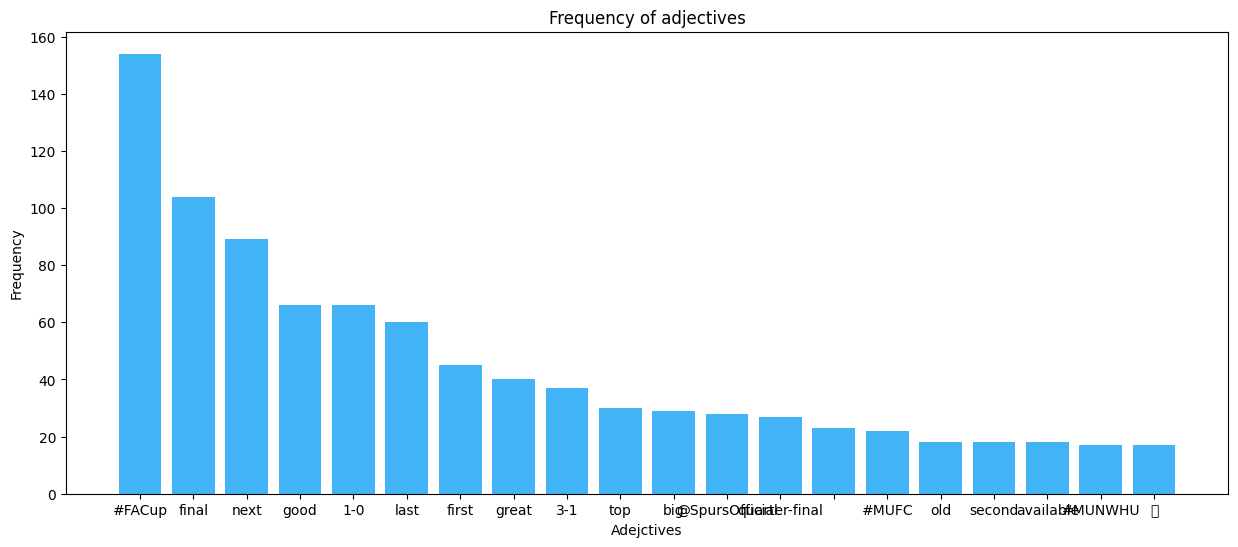

In [28]:
#Plot the graph
mentions_keys = top_mentions.keys().to_numpy()
number_of_mentions = top_mentions.values
plt.figure(figsize=(15,6))
plt.xlabel('Adejctives')
plt.ylabel('Frequency')
plt.title('Frequency of adjectives')
plt.bar(most_common_adjectives,freq,color='#42b3f5')
plt.show()

### Sentiment analysis

Let us now write a function to preprocess tweets by replacing mentions with a common text '@user' and urls with 'http'. Since we are using a model called twitter-roberta-base-sentiment.
RoBERTa (short for “Robustly Optimized BERT Approach”) is a variant of the BERT (Bidirectional Encoder Representations from Transformers) model, which was developed by researchers at Facebook AI. Like BERT, RoBERTa is a transformer-based language model that uses self-attention to process input sequences and generate contextualized representations of words in a sentence.

We will be using https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment model. This is a roBERTa-base model trained on ~58M tweets and finetuned for sentiment analysis with the TweetEval benchmark. This model is suitable for English.

Labels: 0 -> Negative; 1 -> Neutral; 2 -> Positive

In [37]:
#Function to get preprocessed tweets, replacing mentions with @user and URLs with http.
def preprocess_tweet(tweet):
    tweet_words = [];
    for word in tweet.split(' '):
        if word.startswith('@') and len(word) > 1:
            word = '@user'
        elif word.startswith('http'):
            word = 'http'
        
        tweet_words.append(word)
    return " ".join(tweet_words) 

In [38]:
#Import libraries required for sentiment analysis
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [39]:
#load model and tokenizer

roberta = "cardiffnlp/twitter-roberta-base-sentiment"

model = AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)

labels = ["Negative", "Neutral", "Positive"]

In [40]:
#Write a function to get sentiment score from the preprocessed tweet

def analyse_sentiment(tweet_preprocessed):
    encoded_tweet = tokenizer(tweet_preprocessed, return_tensors='pt')
    output = model(**encoded_tweet)
    return output

In [41]:
#Write a fruntion to get the final label with highest score from the tweet.
def get_sentiment(tweet):
    tweet_preprocessed = preprocess_tweet(tweet)
    sentiment_analysis_output = analyse_sentiment(tweet_preprocessed)
    scores = sentiment_analysis_output[0][0].detach().numpy()
    sentiment = softmax(scores)
    #argmax is to get the index of highest score.
    return labels[sentiment.argmax()]

In [42]:
#Run sentiment analysis and store it in a column
tweets_df['tweet_sentiment'] = tweets_df['text'].apply(lambda x: get_sentiment(x))

In [43]:
tweets_df['tweet_sentiment'].value_counts()

tweet_sentiment
Neutral     1271
Positive     931
Negative     390
Name: count, dtype: int64

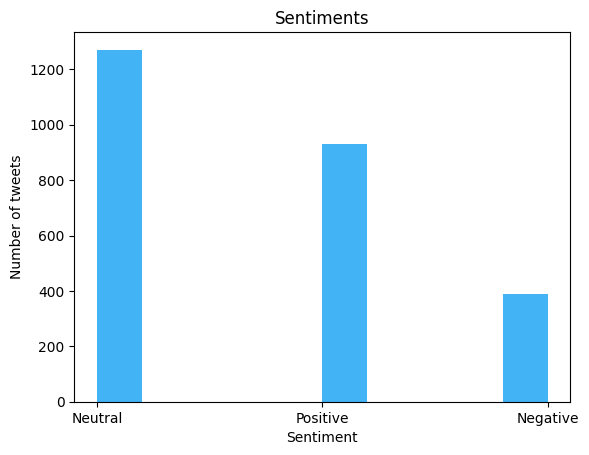

In [36]:
plt.title('Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.hist(tweets_df['tweet_sentiment'],color="#42b3f5")
plt.show()

In [45]:
neutral_data = tweets_df[(tweets_df.tweet_sentiment=='Neutral') & (tweets_df.created_at > datetime(2023,2,28))]
positive_data = tweets_df[(tweets_df.tweet_sentiment=='Positive') & (tweets_df.created_at > datetime(2023,2,28))]
negative_data = tweets_df[(tweets_df.tweet_sentiment=='Negative') & (tweets_df.created_at > datetime(2023,2,28))]

#Group by created at column to get hourly buckets of number of tweets
hourly_neutral_data = neutral_data['created_at'].groupby(by=[neutral_data.created_at.map(lambda x : datetime(x.year, x.month, x.day, x.hour, x.minute))]).count()
hourly_positive_data = positive_data['created_at'].groupby(by=[positive_data.created_at.map(lambda x : datetime(x.year, x.month, x.day, x.hour, x.minute))]).count()
hourly_negative_data = negative_data['created_at'].groupby(by=[negative_data.created_at.map(lambda x : datetime(x.year, x.month, x.day, x.hour, x.minute))]).count()

In [50]:
negative_data.sort_values(by='favorite_count', ascending=False)

,author_id,statuses_count,location,verified,followers_count,friends_count,listed_count,favourites_count,tweet_id,text,created_at,lang,retweet_count,hashtags,favorite_count,tweet_sentiment
1994,1222927522033090000,79005,NaN,False,631101,1225,841,45506,1631048583087790000,#FACup\nFT : Sheffield United 1-0 Tottenham\n\...,2023-03-01 21:47:00,en,40,"[{'text': 'FACup', 'indices': [0, 6]}]",886,Negative
1227,37896651,85275,At a game.,True,1355572,3193,8822,522,1631051045173350000,Who would have thought that Harry Haddock woul...,2023-03-01 21:57:00,en,106,"[{'text': 'FACup', 'indices': [67, 73]}]",651,Negative
228,61862026,27072,Sheffield,False,28611,1206,90,27150,1631065415391620000,Jack Robinson!! That is the tweet! 🤩\n\nWhat a...,2023-03-01 22:54:00,en,9,"[{'text': 'sufc', 'indices': [94, 99]}, {'text...",548,Negative
117,346132040,46083,NaN,False,4247,1365,73,56924,1631071092415630000,I chose to spend a lot of money getting up to ...,2023-03-01 23:17:00,en,19,"[{'text': 'FACup', 'indices': [272, 278]}]",376,Negative
1842,890126283241402000,11686,"Tottenham, London",False,86226,76060,331,3080,1631048985182910000,Really disappointing performance. Our #FACup r...,2023-03-01 21:49:00,en,9,"[{'text': 'FACup', 'indices': [38, 44]}, {'tex...",343,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,1566745329009030000,2784,NaN,False,69,470,0,2457,1631050647603670000,Shite draw #facup sheff United away,2023-03-01 21:55:00,en,0,"[{'text': 'facup', 'indices': [11, 17]}]",0,Negative
1374,4924340501,2448,"Port Talbot, Wales",False,316,939,0,9380,1631050640129440000,If you want to win a cup you play your stronge...,2023-03-01 21:55:00,en,0,"[{'text': 'FACup', 'indices': [105, 111]}, {'t...",0,Negative
591,4710813737,4465,Straight af,False,197,885,9,22557,1631056142808880000,I am glad that I didn‘t have the time to watch...,2023-03-01 22:17:00,en,0,"[{'text': 'SHUTOT', 'indices': [92, 99]}, {'te...",0,Negative
1383,1002573013928240000,1659,D.C,False,949,1151,1,20055,1631050621779410000,He should’ve never done that!🤣🤣\nInstant karma...,2023-03-01 21:55:00,en,0,"[{'text': 'MUNWH', 'indices': [49, 55]}, {'tex...",0,Negative


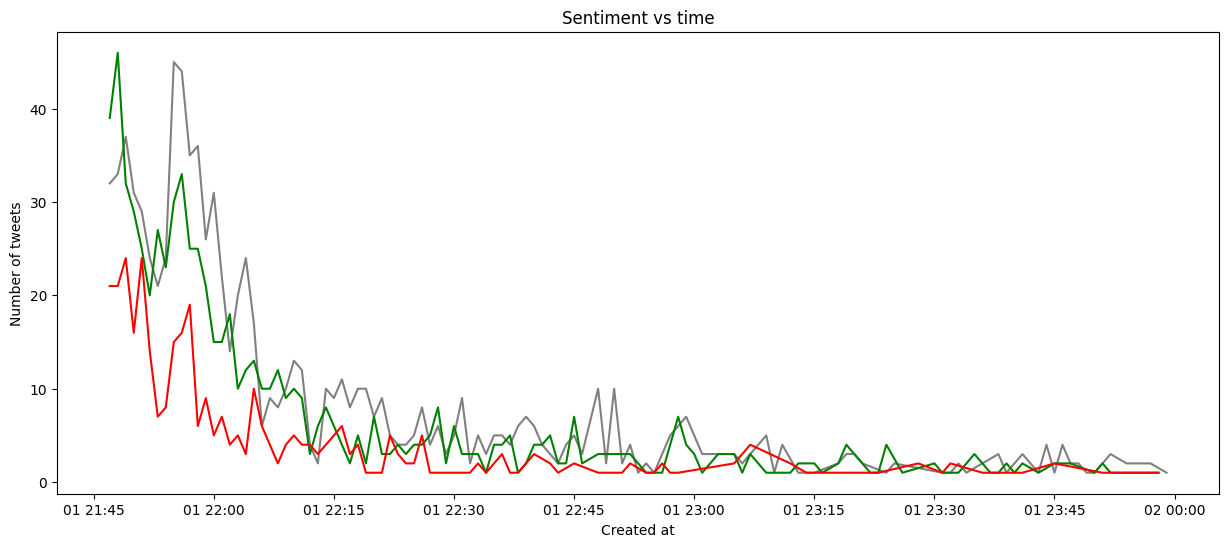

In [47]:
#Plot the graph
plt.figure(figsize=(15,6))
plt.xlabel('Created at')
plt.ylabel('Number of tweets')
plt.title('Sentiment vs time')
plt.plot(hourly_neutral_data, label = "Neutral", color='grey')
plt.plot(hourly_positive_data, label = "Positive", color='green')
plt.plot(hourly_negative_data, label = "Negative", color='red')

### Topic modelling

Please find topic modelling in a different notebook. I was having trouble installing a particular library on macOS which worked well on Google colab environment. So I have performed topic modelling in the another notebook, which I have shared.

### Choosing a micro influencer

Now that we have performed different analysis on twitter data, we can go ahead and choose a micro influencer. A micro influencer is a person with aroun 10000 to 100000 followers on social media platforms.

In [53]:

#Filter follower count between 10k to 100k
followers_10k_100k= tweets_df.loc[(tweets_df.followers_count <= 100000) & (tweets_df.followers_count >= 10000)]

In [54]:
followers_10k_100k.author_id.value_counts()

author_id
361348993              19
1406215235829180000     9
863377035661647000      8
61862026                7
1349032294854490000     7
                       ..
4242639484              1
1004178318              1
1377988811955650000     1
978869945437126000      1
86327160                1
Name: count, Length: 131, dtype: int64

In [55]:
most_active_100k = [361348993,1406215235829180000,863377035661647000]
most_active_100k_df = followers_10k_100k[followers_10k_100k.author_id.isin(most_active_100k)]

In [60]:
most_active_100k_df[['author_id','text','favorite_count']]

,author_id,text,favorite_count
30,1406215235829180000,"""IM SO HAPPY I APOLOGISED TO WOUT WEGHORST!""\n...",135
177,1406215235829180000,Casemiro gives his shirt to a young #MUFC fan ...,197
183,1406215235829180000,That finish by Alejandro Garnacho 😮‍💨\n\n🎥 @it...,133
203,1406215235829180000,Alejandro Garnacho with his FA Cup Player of t...,339
216,1406215235829180000,🗣 Erik ten Hag on Alejandro Garnacho: \n\n“Gre...,65
221,1406215235829180000,🗣 Erik ten Hag: \n\n“This team hates losing. W...,74
223,1406215235829180000,🗣 Erik ten Hag on Alejandro Garnacho: \n\n“I s...,59
432,1406215235829180000,Steve McClaren tells Erik ten Hag “you did it”...,402
499,1406215235829180000,OFFICIAL: #MUFC will face Fulham in the #FACup...,88
2065,863377035661647000,🚨 Maximo Perrone will not start for Man City v...,50
